In [495]:
%load_ext autoreload
%autoreload 2
import importlib
import Drawing
importlib.reload(Drawing)
from Drawing import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [385]:
import sys

import os
import tempfile

def drawFig(fig, name='output', colors='byLayer', show=False, ordonne=False):
    #dir = 'outputs'
    #figfile = f'{dir}/{name}.fig'
    figfile = f'{name}.fig'
    
    with open(figfile, 'w') as f:
        f.write(fig.getFigStream())
        #f.write(fig.fig_stream)

    #with open(os.devnull, 'w') as devnull:
        #stdout = sys.stdout; sys.stdout = devnull
        #fig()
        #ms.drawMS(figfile, colors=colors, neglect=-1, ordonne=ordonne, colL={})
        #sys.stdout = fig

    #os.system(f'fig2dev -Lpng {figfile} {dir}/{name}.png')
    #os.system(f'fig2dev -Lpdf {figfile} {dir}/{name}.pdf')

    os.system(f'fig2dev -Lpng {figfile} {name}.png')
    os.system(f'fig2dev -Lpdf {figfile} {name}.pdf')
    
    from IPython.display import display, Image, FileLink
    if show:
        #png = f'{dir}/{name}.png'
        png = f'{name}.png'
        display(Image(png))
        display(FileLink(png))



In [386]:
def f0_node_and_time():
    sg = Drawing(alpha=0, omega=10)

    sg.addNode("u")
    sg.addNode("v")
    '''

    sg.addNode("w")

    sg.addLink("u", "v", 1, 2)
    sg.addLink("v", "w", 2, 3)
    '''

    #sg.addPath(((2,"u","v"), (2,"v","w")), 2, 2, color=11, width=6)

    sg.addTimeLine()
    return sg

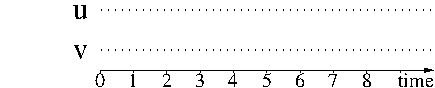

/work/streamfig/examples/f0_node_and_time.png

In [387]:
fig = f0_node_and_time()
print()
#drawFig(fig.getFigStream(), name='monkey', show=True)
drawFig(fig, name='f0_node_and_time', show=True)

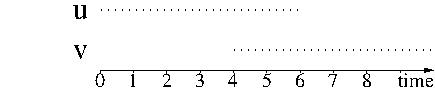

/work/streamfig/examples/f1_node_over_time.png

In [388]:
def f1_node_over_time():
    sg = Drawing(alpha=0, omega=10)

    sg.addNode("u", [(0,6)])
    sg.addNode("v", [(4,10)])
    #sg.addPath(((2,"u","v"), (2,"v","w")), 2, 2, color=11, width=6)

    sg.addTimeLine()
    return sg
fig = f1_node_over_time()
drawFig(fig, name='f1_node_over_time', show=True)    

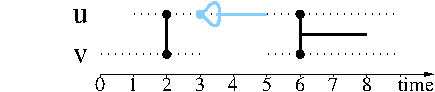

/work/streamfig/examples/f2_link_over_time.png

In [615]:
def f2_link_over_time():
    sg = Drawing(alpha=0, omega=10)

    sg.addNode("u", [(1,9)])
    sg.addNode("v", [(0,3),(5,9)])
    #sg.addPath(((2,"u","v"), (2,"v","w")), 2, 2, color=11, width=6)
    sg.addLink("u", "v", 2, 2, curving = 0)
    sg.addLink("u", "v", 6, 8, height = 0.5)
    sg.addLink("u", "u", 3, 5, color = 11, loop_size = 5)
    #sg.addLink("v", "v", 1, 1, height = 0.5)
    
    '''
    sg.fig_stream +='3 0 2 '+str(3)+' '+str(11)+' 0 10 0 -1 0 0 0 0 '+str(4)+'\n'
    ux = 4950
    uy = 3450
    loop_size = 3
    loop_size *= 100
    sg.fig_stream += str(ux)+" "+str(uy)+" "
    sg.fig_stream += str(ux+int(loop_size/2))+" "+str(uy+int(loop_size/3))+" "
    sg.fig_stream += str(ux+int(loop_size/2))+" "+str(uy-int(loop_size/3))+" "
    sg.fig_stream += str(ux)+" "+str(uy)
    sg.fig_stream += "\n"
    sg.fig_stream += "1 -1 -1 -1 -1 1\n"
    '''


    sg.addTimeLine()
    return sg
fig = f2_link_over_time()
drawFig(fig, name='f2_link_over_time', show=True)   

TODO: left align for histogram


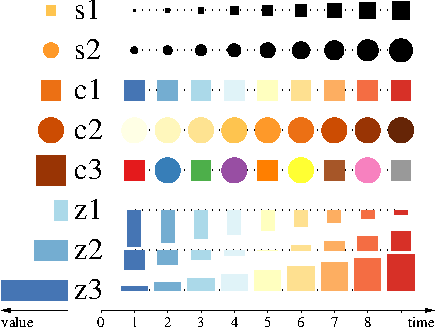

/work/streamfig/examples/f3_node_weight.png

In [734]:
def f3_node_weight():
    sg = Drawing(alpha=0, omega=10)

    sg.addColor("red", "#FF8080")
    red_list = ['#d73027','#f46d43','#fdae61','#fee090','#ffffbf','#e0f3f8','#abd9e9','#74add1','#4575b4']
    brown_list = ['#ffffe5','#fff7bc','#fee391','#fec44f','#fe9929','#ec7014','#cc4c02','#993404','#662506']
    color_list = ['#e41a1c','#377eb8','#4daf4a','#984ea3','#ff7f00','#ffff33','#a65628','#f781bf','#999999']

    for i in range(9):
       sg.addColor("red"+str(i+1), red_list[-(i+1)])
       sg.addColor("brown"+str(i+1), brown_list[i])
       sg.addColor("color"+str(i+1), color_list[i])

    sg.addNode("s1", [(1,9)])
    sg.addNode("s2", [(1,9)])
    sg.addNode("c1", [(1,9)])
    sg.addNode("c2", [(1,9)])
    sg.addNode("c3", [(1,9)])
    sg.addNode("z1", [(1,9)])
    sg.addNode("z2", [(1,9)])
    sg.addNode("z3", [(1,9)])



    #sg.stdout_print = True
    sg.addNodeValue('s1', -1.5, size = 5, color="brown"+str(4), glyph='rectangle')
    sg.addNodeValue('s2', -1.5, size = 10, color="brown"+str(5), glyph='circle')
    sg.addNodeValue('c1', -1.5, size = 10, color="brown"+str(6), glyph='rectangle')
    sg.addNodeValue('c2', -1.5, size = 20, color="brown"+str(7), glyph='circle')
    sg.addNodeValue('c3', -1.5, size = 15, color="brown"+str(8), glyph='rectangle')
    sg.addNodeValue('z1', -1, size = 20, color="red"+str(3), glyph='bar', bar_width=15)
    sg.addNodeValue('z2', -1, size = 50, color="red"+str(2), glyph='bar', bar_width=15)
    sg.addNodeValue('z3', -1, size = 100, color="red"+str(1), glyph='bar', bar_width=15)


    #sg.stdout_print = False

    for i in range(1, 10):
        sg.addNodeValue('s1', i, size = i, glyph='rectangle')
        sg.addNodeValue('s2', i, size = 2*i, glyph='circle')
        sg.addNodeValue('c1', i, size = 10, color="red"+str(i) ,glyph='rectangle')
        sg.addNodeValue('c2', i, size = 20, color="brown"+str(i), glyph='circle')
        if i%2 == 0:
            sg.addNodeValue('c3', i, size = 20, color="color"+str(i), glyph='circle')
        else:
            sg.addNodeValue('c3', i, size = 10, color="color"+str(i), glyph='rectangle')
        sg.addNodeValue('z1', i, size = -6*(10-i), color="red"+str(i), glyph='bar', bar_width=20)
        sg.addNodeValue('z2', i, size = 7*(i-5), color="red"+str(i), glyph='bar', bar_width=30)
        sg.addNodeValue('z3', i, size = 6*(i), color="red"+str(i), glyph='bar', bar_width=40)
   
    sg.addTimeLine(histogram=True, histogram_label='value')
    return sg

fig = f3_node_weight()
drawFig(fig, name='f3_node_weight', show=True) 

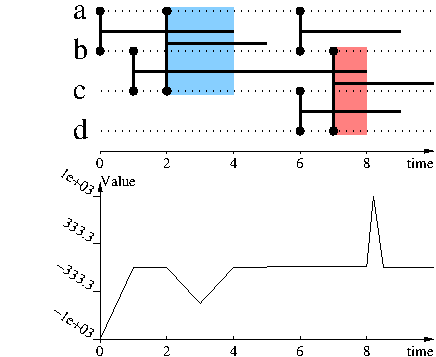

/work/streamfig/examples/f4_rectangles.png

In [725]:
def f4_rectangles():
    sg = Drawing()
    sg.addColor("red", "#FF8080")
    sg.addNode("a")
    sg.addNode("b")
    sg.addNode("c")
    sg.addNode("d")

    sg.addLink("a", "b", 0, 4)
    sg.addLink("a", "b", 6, 9)
    sg.addLink("a", "c", 2, 5, height=0.4)
    sg.addLink("b", "c", 1, 8)
    sg.addLink("b", "d", 7, 10, height=0.4)
    sg.addLink("c", "d", 6, 9)

    sg.addRectangle("a","c",2,4,color=11)#, depth=1150)
    #sg.addRectangle("b","d",7,8,color="red")
    #sg.stdout_print = True
    sg.addRectangle("b","d",7,8,color="red")
    #sg.stdout_print = False

    points = [(0,-1000), (1,2), (2,3), (3, -500), (5,10), (4, 3), (10, 9), (8, 20), (8.5, 10), (8.2, 1000)]
    
    sg.addMeasures(points, invert_y_axis = True)
    sg.addTimeLine(ticks=2)


    return sg
    

fig = f4_rectangles()
drawFig(fig, name='f4_rectangles', show=True) 